**<h1>Visualização por nuvem de palavras</h1>**

Primeiros contatos com webscrapping e análise exploratória de dados, com identificação de termos mais citados etc. visualizados por nuvem de palavras.




In [ ]:
#!pip install newspaper3k
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from newspaper import Article
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image


<h3>Stopwords em português</h3>

In [52]:
nltk.download('stopwords')
STOPWORDS = nltk.corpus.stopwords.words('portuguese')
len(STOPWORDS)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


204

In [54]:

#dataset = open("sampleWords.txt", "r").read()
def create_word_cloud(string):
   maskArray = np.array(Image.open("cloud.jpg")) #uso do numpy
   cloud = WordCloud(background_color = "white", max_font_size=50, max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
   plt.figure()
   plt.imshow(cloud, interpolation='bilinear')
   plt.axis('off')
#dataset = dataset.lower()


<h2>Utilizando a biblioteca Newspaper3k </h2>



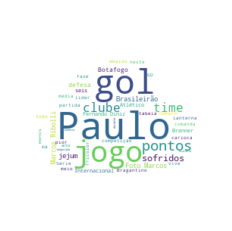

In [55]:
article = Article('https://globoesporte.globo.com/futebol/times/sao-paulo/noticia/sao-paulo-tem-a-pior-defesa-da-serie-a-em-2021-ao-lado-do-lanterna-botafogo-veja-lista.ghtml', 'pt-br')
article.download()
article.parse()
create_word_cloud(article.text)

<h2>Utilizando DataSet</h2>

In [21]:
df = pd.read_csv('/content/campoes_brasileiro.csv')
df.head()


,Ano,Vencedor,Vice,Terceiro colocado,Quarto colocado,Artilheiro(s),Gols
0,1959,Bahia,Santos,Grêmio,Vasco da Gama,Léo Briglia (Bahia),8
1,1960,Palmeiras,Fortaleza,Fluminense,Santa Cruz,Bececê (Fortaleza),7
2,1961,Santos,Bahia,America,Náutico,Pelé (Santos),7
3,1962,Santos,Botafogo,Internacional,Sport,Coutinho (Santos),7
4,1963,Santos,Bahia,Grêmio,Botafogo,Pelé (Santos),8


In [59]:
# Os 5 times que mais ganharam o campeonato
df['Vencedor'].value_counts().head()


Palmeiras      10
Santos          8
Corinthians     7
Flamengo        6
São             6
Name: Vencedor, dtype: int64

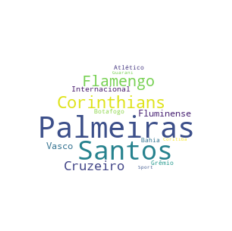

In [56]:
vencedores = " ".join(df['Vencedor'].tolist() )
create_word_cloud(vencedores)


In [57]:
# Jogadores que mais vezes foram eleitos artilheiros do campeonato
df['Artilheiro(s)'].value_counts().head()

Pelé (Santos)                       3
Zico (Flamengo)                     2
Romário (Vasco da Gama)             2
Fred (Fluminense)                   2
Roberto Dinamite (Vasco da Gama)    2
Name: Artilheiro(s), dtype: int64

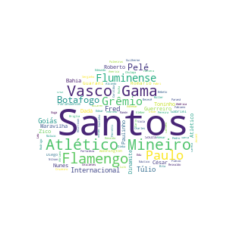

In [58]:
artilheiros = " ".join(df['Artilheiro(s)'].tolist() )
create_word_cloud(artilheiros)